In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Problem Statement 13: (Multi-line header)

In [57]:
hospital_data = pd.read_csv("Data\government_hospitals.csv", header=[0, 1])
hospital_data.head(5)

,States/UTs,Rural hospitals,Unnamed: 2_level_0,Urban hospitals,Unnamed: 4_level_0,As on
,Unnamed: 0_level_1,No.,Beds,No.,Beds,Unnamed: 5_level_1
0,Andhra Pradesh,193,6480,65,16658,01.01.2017
1,Arunachal Pradesh*,208,2136,10,268,31.12.2017
2,Assam,1176,10944,50,6198,31.12.2017
3,Bihar,930,6083,103,5936,31.12.2016
4,Chhattisgarh,169,5070,45,4342,01.01.2016


In [58]:
hospital_data.columns = ['State/UT', 'Rural_Government_Hospitals', 'Rural_Government_Beds', 
                         'Urban_Government_Hospitals', 'Urban_Government_Beds', 'Last_Updated']

In [59]:
hospital_data.head(5)

,State/UT,Rural_Government_Hospitals,Rural_Government_Beds,Urban_Government_Hospitals,Urban_Government_Beds,Last_Updated
0,Andhra Pradesh,193,6480,65,16658,01.01.2017
1,Arunachal Pradesh*,208,2136,10,268,31.12.2017
2,Assam,1176,10944,50,6198,31.12.2017
3,Bihar,930,6083,103,5936,31.12.2016
4,Chhattisgarh,169,5070,45,4342,01.01.2016


## Problem Statement 14: (Data update and code reuse)

In [60]:
hospital_data['Last_Updated'] = pd.to_datetime(hospital_data['Last_Updated'], format='%d.%m.%Y').dt.strftime('%Y-%m-%d')

In [61]:
hospital_data

,State/UT,Rural_Government_Hospitals,Rural_Government_Beds,Urban_Government_Hospitals,Urban_Government_Beds,Last_Updated
0,Andhra Pradesh,193,6480,65,16658,2017-01-01
1,Arunachal Pradesh*,208,2136,10,268,2017-12-31
2,Assam,1176,10944,50,6198,2017-12-31
3,Bihar,930,6083,103,5936,2016-12-31
4,Chhattisgarh,169,5070,45,4342,2016-01-01
5,Goa*,17,1405,25,1608,2017-12-31
6,Gujarat,364,11715,122,20565,2016-12-31
7,Haryana*,609,6690,59,4550,2016-12-31
8,Himachal Pradesh*,705,5665,96,6734,2017-12-31
9,Jammu & Kashmir,56,7234,76,4417,2016-12-30


In [62]:
def clean_state_names(name):

    name = name.title().replace('&', 'and')
    
    words = name.split()
    camel_case = []
    for word in words:
        if word.lower() == 'and':
            camel_case.append('and')
        else:
            camel_case.append(word.capitalize())

    return ' '.join(camel_case)

hospital_data['State/UT'] = hospital_data['State/UT'].apply(clean_state_names)
hospital_data

,State/UT,Rural_Government_Hospitals,Rural_Government_Beds,Urban_Government_Hospitals,Urban_Government_Beds,Last_Updated
0,Andhra Pradesh,193,6480,65,16658,2017-01-01
1,Arunachal Pradesh*,208,2136,10,268,2017-12-31
2,Assam,1176,10944,50,6198,2017-12-31
3,Bihar,930,6083,103,5936,2016-12-31
4,Chhattisgarh,169,5070,45,4342,2016-01-01
5,Goa*,17,1405,25,1608,2017-12-31
6,Gujarat,364,11715,122,20565,2016-12-31
7,Haryana*,609,6690,59,4550,2016-12-31
8,Himachal Pradesh*,705,5665,96,6734,2017-12-31
9,Jammu and Kashmir,56,7234,76,4417,2016-12-30


In [63]:
hospital_data.to_csv('Clean Data/government_hospital.csv', index=False)

## Problem Statement 15: (Government healthcare facility disparity)

In [64]:
govt_hosp_data = pd.read_csv("Clean Data/government_hospital.csv")
census_data = pd.read_csv("Clean Data\census.csv")
census_data

,State/UT,District Name,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,23226.0,181664.0,600759.0,178435.0,89679.0,1481.0
1,Jammu and Kashmir,Badgam,753745.0,398041.0,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,Ladakh,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,21019.0,250.0
3,Ladakh,Kargil,140802.0,77785.0,63017.0,86236.0,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,Jammu and Kashmir,Punch,476835.0,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,Pondicherry,Mahe,41816.0,19143.0,22673.0,36470.0,16610.0,19860.0,0.0,12110.0,12110.0,19760.0,12543.0,9428.0,85.0
636,Pondicherry,Karaikal,200222.0,97809.0,102413.0,154916.0,79903.0,75013.0,35618.0,33715.0,69333.0,NaN,60089.0,NaN,366.0
637,Andaman and Nicobar Islands,Nicobars,36842.0,20727.0,16115.0,25332.0,15397.0,9935.0,15958.0,0.0,15958.0,18786.0,12088.0,5922.0,46.0
638,Andaman and Nicobar Islands,North AND Middle Andaman,105597.0,54861.0,50736.0,78683.0,43186.0,35497.0,39091.0,1094.0,40185.0,57350.0,30741.0,17464.0,42.0


In [65]:
govt_hosp_data['State/UT'] = govt_hosp_data['State/UT'].str.replace('[^a-zA-Z ]', '', regex=True).str.title().str.replace(' ', '')
govt_hosp_data

,State/UT,Rural_Government_Hospitals,Rural_Government_Beds,Urban_Government_Hospitals,Urban_Government_Beds,Last_Updated
0,AndhraPradesh,193,6480,65,16658,2017-01-01
1,ArunachalPradesh,208,2136,10,268,2017-12-31
2,Assam,1176,10944,50,6198,2017-12-31
3,Bihar,930,6083,103,5936,2016-12-31
4,Chhattisgarh,169,5070,45,4342,2016-01-01
5,Goa,17,1405,25,1608,2017-12-31
6,Gujarat,364,11715,122,20565,2016-12-31
7,Haryana,609,6690,59,4550,2016-12-31
8,HimachalPradesh,705,5665,96,6734,2017-12-31
9,JammuAndKashmir,56,7234,76,4417,2016-12-30


In [66]:
merged_data = pd.merge(census_data, govt_hosp_data, on='State/UT')

In [67]:
merged_data['Rural_Government_Beds'] = pd.to_numeric(merged_data['Rural_Government_Beds'], errors='coerce')
merged_data['Urban_Government_Beds'] = pd.to_numeric(merged_data['Urban_Government_Beds'], errors='coerce')

merged_data['Total_Government_Beds_per_10000'] = (merged_data['Rural_Government_Beds'] + merged_data['Urban_Government_Beds']) / (merged_data['Population'] / 10000)

merged_data

,State/UT,District Name,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,...,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated,Rural_Government_Hospitals,Rural_Government_Beds,Urban_Government_Hospitals,Urban_Government_Beds,Last_Updated,Total_Government_Beds_per_10000
0,Punjab,Gurdaspur,2298323.0,1212617.0,1085706.0,1634719.0,907660.0,727059.0,420860.0,185488.0,...,1261421.0,611353.0,423301.0,2248.0,510,5805,172,12128,2017-12-31,78.026457
1,Punjab,Kapurthala,815168.0,426311.0,388857.0,576567.0,316254.0,260313.0,165433.0,95770.0,...,433331.0,222324.0,157833.0,1680.0,510,5805,172,12128,2017-12-31,219.991462
2,Punjab,Jalandhar,2193590.0,1145211.0,1048379.0,1622537.0,882581.0,739956.0,330339.0,377791.0,...,1159156.0,616431.0,416449.0,1554.0,510,5805,172,12128,2017-12-31,81.751831
3,Punjab,Hoshiarpur,1586625.0,809057.0,777568.0,1199699.0,637927.0,561772.0,422673.0,128592.0,...,831741.0,422782.0,330671.0,1431.0,510,5805,172,12128,2017-12-31,113.026077
4,Punjab,Shahid Bhagat Singh Nagar,612310.0,313291.0,299019.0,438459.0,239155.0,199304.0,183168.0,48383.0,...,318597.0,163305.0,128310.0,2098.0,510,5805,172,12128,2017-12-31,292.874524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,Kerala,Kottayam,1974551.0,968289.0,1006262.0,1749798.0,861592.0,888206.0,481967.0,196194.0,...,811653.0,596302.0,565048.0,1548.0,981,16865,299,21139,2017-01-01,192.469073
352,Kerala,Alappuzha,2127789.0,1013142.0,1114647.0,1852797.0,890552.0,962245.0,331419.0,392117.0,...,891512.0,648522.0,585591.0,2164.0,981,16865,299,21139,2017-01-01,178.607935
353,Kerala,Pathanamthitta,1197412.0,561716.0,635696.0,1062553.0,499181.0,563372.0,414992.0,57848.0,...,479207.0,346161.0,370887.0,1157.0,981,16865,299,21139,2017-01-01,317.384493
354,Kerala,Kollam,2635375.0,1246968.0,1388407.0,2240273.0,1074345.0,1165928.0,523715.0,401415.0,...,1177359.0,795245.0,660965.0,1806.0,981,16865,299,21139,2017-01-01,144.207181


In [68]:
lowest_states = merged_data.nsmallest(3, 'Total_Government_Beds_per_10000')
lowest_states

,State/UT,District Name,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,...,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated,Rural_Government_Hospitals,Rural_Government_Beds,Urban_Government_Hospitals,Urban_Government_Beds,Last_Updated,Total_Government_Beds_per_10000
20,Chandigarh,Chandigarh,1055450.0,580663.0,474787.0,805438.0,465346.0,340092.0,8911.0,289456.0,...,602411.0,303748.0,148945.0,346.0,0,0,4,778,2016-12-31,7.371263
115,Bihar,Patna,5838465.0,3078512.0,2759953.0,3459679.0,2028047.0,1431632.0,657991.0,552103.0,...,3626564.0,1382654.0,815638.0,13609.0,930,6083,103,5936,2016-12-31,20.585890
230,Chhattisgarh,Raipur,4063872.0,2048186.0,2015686.0,2629749.0,1493158.0,1136591.0,673499.0,395001.0,...,2454299.0,1038155.0,560184.0,11234.0,169,5070,45,4342,2016-01-01,23.160178


In [69]:
print("Three States/UTs with the least amount of government beds for their population:")
print(lowest_states[['State/UT', 'Total_Government_Beds_per_10000']])

Three States/UTs with the least amount of government beds for their population:
         State/UT  Total_Government_Beds_per_10000
20     Chandigarh                         7.371263
115         Bihar                        20.585890
230  Chhattisgarh                        23.160178


In [70]:
recommended_state = lowest_states.nsmallest(1, 'Rural_Government_Hospitals')
print("Recommended State for setting up a new government hospital:")
print(recommended_state[['State/UT', 'Rural_Government_Hospitals']])

Recommended State for setting up a new government hospital:
      State/UT  Rural_Government_Hospitals
20  Chandigarh                           0


##  Problem Statement 16: (Gap in number of beds)

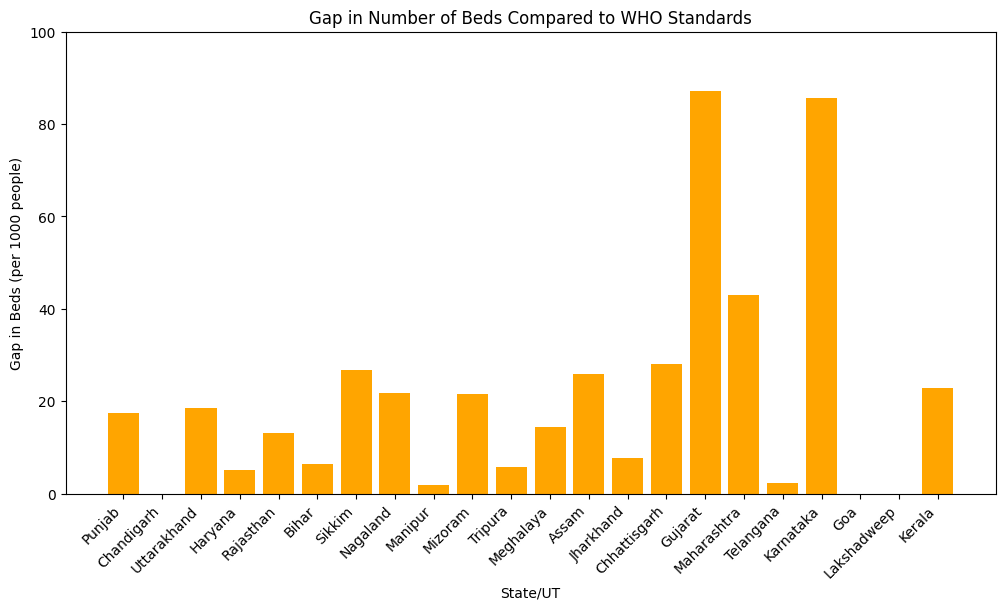

In [71]:

expected_beds_per_1000 = 3
merged_data['Beds_per_1000'] = (merged_data['Urban_Government_Beds'] / (merged_data['Population'] / 1000))

# Calculate the gap in beds
merged_data['Gap_in_Beds'] =  merged_data['Beds_per_1000'] - expected_beds_per_1000
# print(max(merged_data["Gap_in_Beds"]))
# print(merged_data["Gap_in_Beds"])
# Plotting
plt.figure(figsize=(12, 6))
plt.bar(merged_data['State/UT'], merged_data['Gap_in_Beds'], color='orange')

# Adding labels and title
plt.xlabel('State/UT')
plt.ylabel('Gap in Beds (per 1000 people)')
plt.title('Gap in Number of Beds Compared to WHO Standards')
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 100)
# Show the plot
plt.show()


## Problem Statement 17: (Hospitals required to meet the standards)

In [80]:

total_gap = merged_data['Gap_in_Beds'].sum()

# Find the average number of beds in a government hospital
average_beds_per_hospital = merged_data['Beds_in_Govt_Hospitals'].mean()

# Calculate the required number of government hospitals
required_hospitals = round(average_beds_per_hospital / total_gap)


# Print the required number of government hospitals
print(f"The government may need to build approximately {required_hospitals} government hospitals to fill the gap and meet WHO standards.")


The government may need to build approximately 9 government hospitals to fill the gap and meet WHO standards.
